# Importando biblioteca

In [79]:
import pandas as pd
import seaborn as sns

### Importando base de dados

In [80]:
dados = pd.read_csv('tips.csv')
#visualizando os dados
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


### Tradução dos dados

In [81]:
# visualizando as colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [82]:
# criando uma lista renomeando as colunas
renomear = {'total_bill' : 'valor_da_conta', 
          'tip': 'gorjeta', 
          'dessert' : 'sobremesa', 
          'day' : 'dia_da_semana', 
          'time': 'hora_do_dia', 
          'size': 'total_de_pessoas'
}

In [83]:
# Atribuindo o dataframe a uma nova coluna e passando rename columns com a lista 
gorjetas = dados.rename(columns= renomear)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [84]:
# vendo os valores da coluna sobremesa
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [85]:
# criando uma lista
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [86]:
# Mapeando os novos valores na coluna sobremesa
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [87]:
# Realizando a alteração dos valores de sobremesa com map
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [88]:
# Agora visualizando os valores da coluna dia da semana. 
# dom, sab, quin, sext
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [89]:
# criando a lista dias
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'    
}

In [90]:
# Realizando a alteração dos valores de dia da semana com map
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [91]:
# visualizandp os valores da hora do dia
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [92]:
# Alterando os valores da hora do dia
hora = {
    'Dinner': 'Jantar', 
    'Lunch' : 'Almoço'
}

In [93]:
# Realizando a alteração dos valores da hora do dia com map
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Análise I  - Valor da conta e gorjeta

In [94]:
# verificando as colunas
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

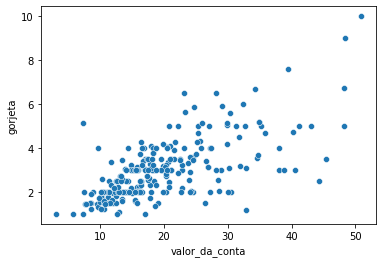

In [95]:
# fazendo grafico valor da conta x gorjeta
valor_gorjeta= sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
valor_gorjeta

Podemos ver que, quanto maior valor da conta, maior a gorjeta

In [96]:
# visualizando o tamanho das linhas 
print('Base de dados contém {} registros'.format(gorjetas.shape[0])) 
# Verificando se tem valores nulos
print('Registros não nulos')
gorjetas.count()

Base de dados contém 244 registros
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

### Criando o campo porcentagem

In [97]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [98]:
# criando a coluna porcentagem
gorjetas['Porcentagem'] = gorjetas.gorjeta / gorjetas.valor_da_conta

In [99]:
# COlocando os valores da porcentagem com duas casas decimais
gorjetas.Porcentagem = gorjetas.Porcentagem.round(2)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


In [100]:
#Visualizando em porcentagem os valores
gorjetas.style.format({'Porcentagem': '{:.2%}'})

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,Porcentagem
0,16.990000,1.010000,Não,Domingo,Jantar,2,6.00%
1,10.340000,1.660000,Não,Domingo,Jantar,3,16.00%
2,21.010000,3.500000,Não,Domingo,Jantar,3,17.00%
3,23.680000,3.310000,Não,Domingo,Jantar,2,14.00%
4,24.590000,3.610000,Não,Domingo,Jantar,4,15.00%
5,25.290000,4.710000,Não,Domingo,Jantar,4,19.00%
6,8.770000,2.000000,Não,Domingo,Jantar,2,23.00%
7,26.880000,3.120000,Não,Domingo,Jantar,4,12.00%
8,15.040000,1.960000,Não,Domingo,Jantar,2,13.00%
9,14.780000,3.230000,Não,Domingo,Jantar,2,22.00%


In [101]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


Text(0.5, 1.0, 'Análise da Porcentagem da gorjeta em função do valor da conta')

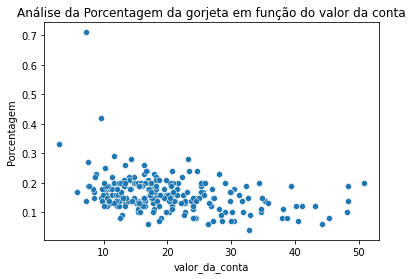

In [102]:
# Plotando grafico de valor da conta X porcentagem
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='Porcentagem', data=gorjetas)
porcentagem_conta.set_title('Análise da Porcentagem da gorjeta em função do valor da conta')

Podemos visulizar que, pratos mais baratos tem uma porcentagem maior de ter gorjetas ao contario de pratos mais caros que tem a porcentagem mais baixa de se ter gorjetas 

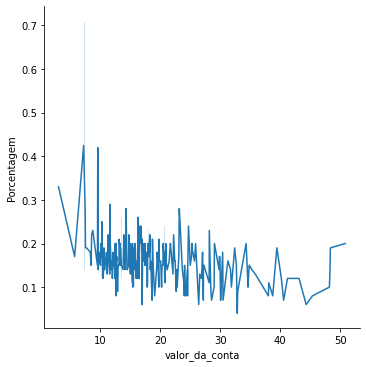

In [103]:
# Grafico de linhas valor da conta x porcentagem
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='Porcentagem', kind='line', data=gorjetas)



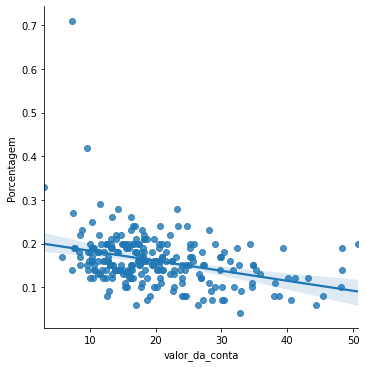

In [104]:
# De forma mais detalhada, verificando atraves de uma linha traçada que o valor esta caindo entra valor da conta e a porcentagem
# de gorjetas
sns.lmplot(x='valor_da_conta', y='Porcentagem', data= gorjetas)

## Análise II - Sobremesa

In [105]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [106]:
# verificando sobremessa iguais a sim
gorjetas[gorjetas.sobremesa =='Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,Porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [107]:
gorjetas[gorjetas.sobremesa =='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,Porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


De 244 refeições, 93 quiseram sobremesa

In [108]:
# Verificando a distribuição de sobremesa igual a nao
gorjetas[gorjetas.sobremesa =='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,Porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


Nesse caso, podemos entender que, de 244 refeições, 151 pessoas nao quiseram sobremesa. Com isso a maioria nao quiseram

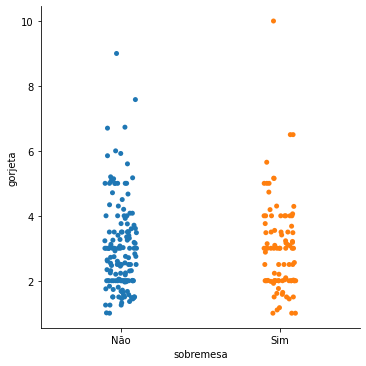

In [109]:
# Grafico categorico de quem pediu ou nao sobremesa
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

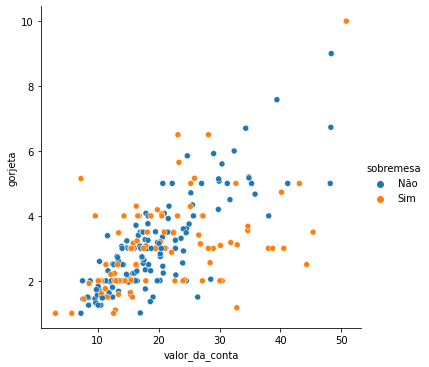

In [110]:
# Graficod e distribuição de valor da conta x gorjeta com base se pedira ou nao sobremesa
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

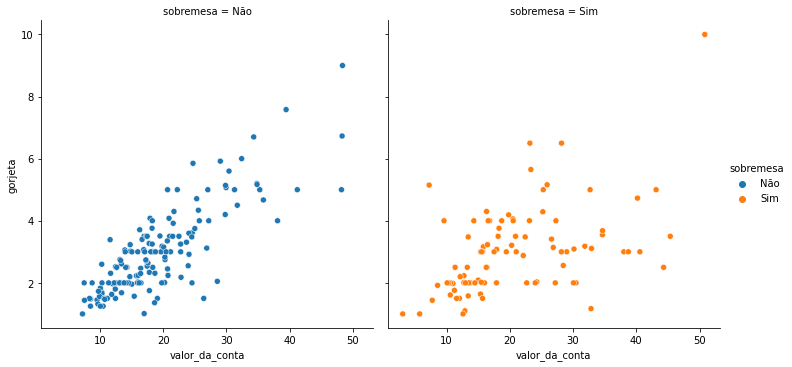

In [111]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

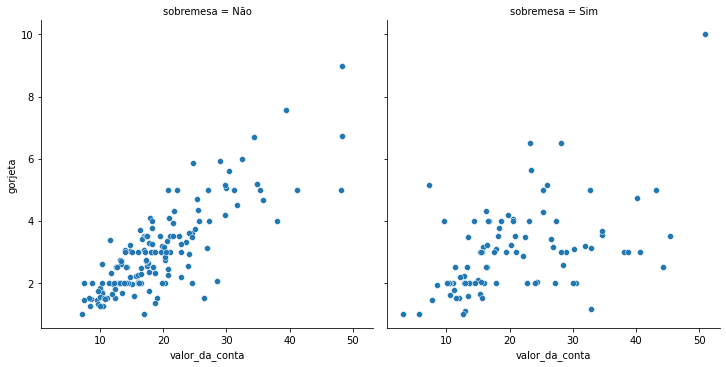

In [112]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

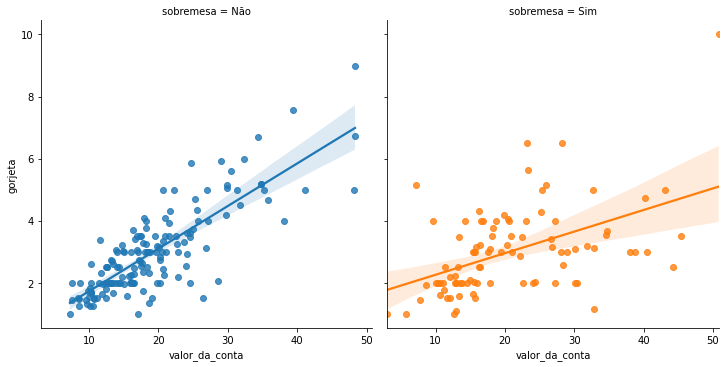

In [113]:
sns.lmplot(x='valor_da_conta', y ='gorjeta', col='sobremesa', hue='sobremesa', data = gorjetas)

Quem nao pede sobremesa o valor da gorjeta baseado no valor da conta é linear. Agora, quem pede sobremesa baseado no valor da conta, a quantidade de gorjetas nao é tao linear e mais baixa

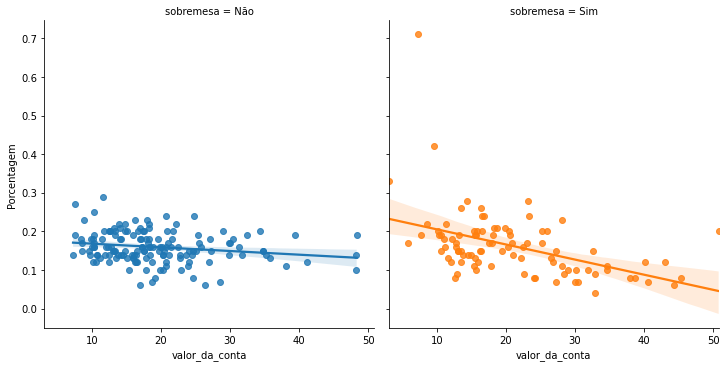

In [114]:
sns.lmplot(x='valor_da_conta', y ='Porcentagem', col='sobremesa', hue='sobremesa', data = gorjetas)

  Quem nao pediu sobremesa nao tem diferença na porcentagem de se pagar gorjeta. Contudo, quem pede sobremesa tem diferença. Valor da conta mais alta a porcentagem da gorjeta é baixa, e quem paga mais barato no prato com sobremesa a porcentagem da gorjeta é alta.

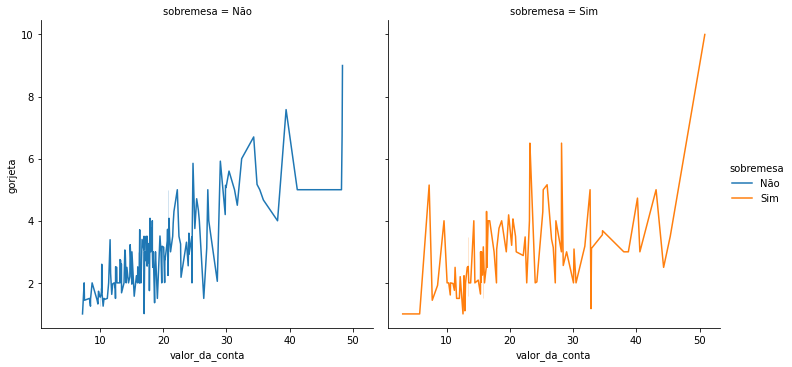

In [115]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

O valor da gorjeta sobe de acordo com valor da conta sem sobremesa. Agora, o valor da gorjeta se mantem mesmo de acordo com o valor da conta com sobremesa

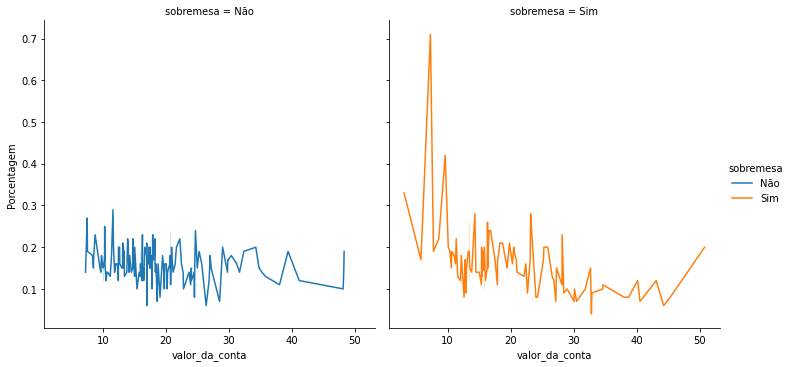

In [116]:
sns.relplot(x='valor_da_conta', y='Porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

A uma diferença, quem pede sobremesa e tem o valor da conta baixa pagam mais gorjetas

## Teste de Hipótese

**H<sup>null</sup>**

**A distribuição da taxa da gorjetas e a mesma nos dois grupos**

**H<sup>alt</sup>**

**A taxa de distribuição da taxa da gorjeta nao e a mesma nos dois grupos**

In [117]:
# importando uma bilbioteca para realizar o teste
from scipy.stats import ranksums

##### Montando query para verificar  a porcentagem de quem pediu ou nao sobremesa

In [118]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").Porcentagem

In [119]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").Porcentagem

In [120]:
r = ranksums(sobremesa, sem_sobremesa)

In [121]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**A distribuição da taxa da gorjetas e a mesma nos dois grupos**

Verificamos que a taxa de gorjeta nao e diferente entre quem pediu ou nao sobremesa, pois se fosse abaixo de 0.5 poderiamos considerar uma hipotese alternativa. Portando é uma hipótese nula!

In [122]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


## Análise III - Dias da semana

In [123]:
# visualizado os dias
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

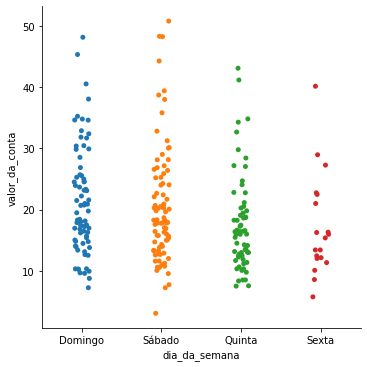

In [124]:
# Grafico represtantando qual dia tem se mais gastos
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

visualmente quinta e sexta, tem se valores das contas mais baixos

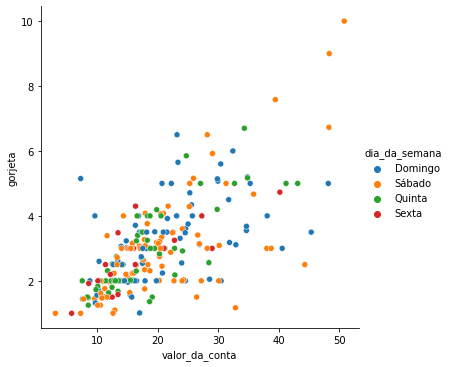

In [125]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

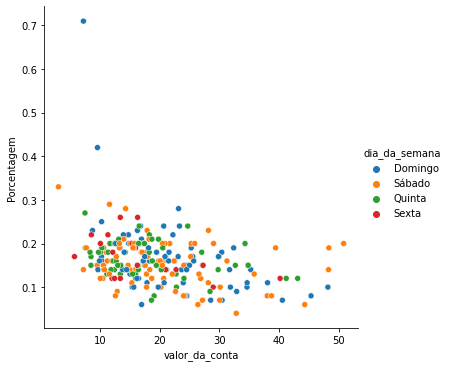

In [126]:
sns.relplot(x='valor_da_conta', y='Porcentagem', hue='dia_da_semana', data=gorjetas)

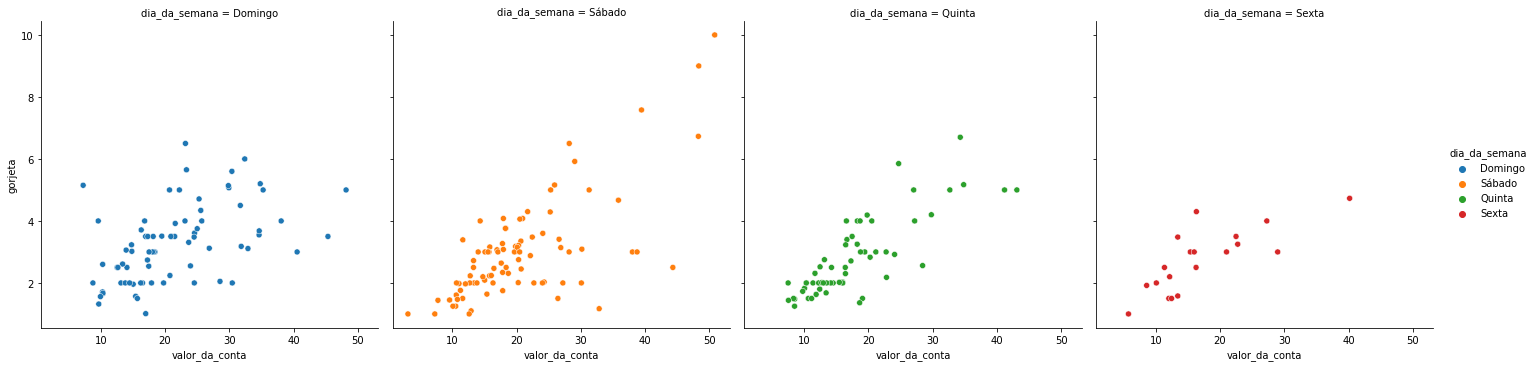

In [127]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

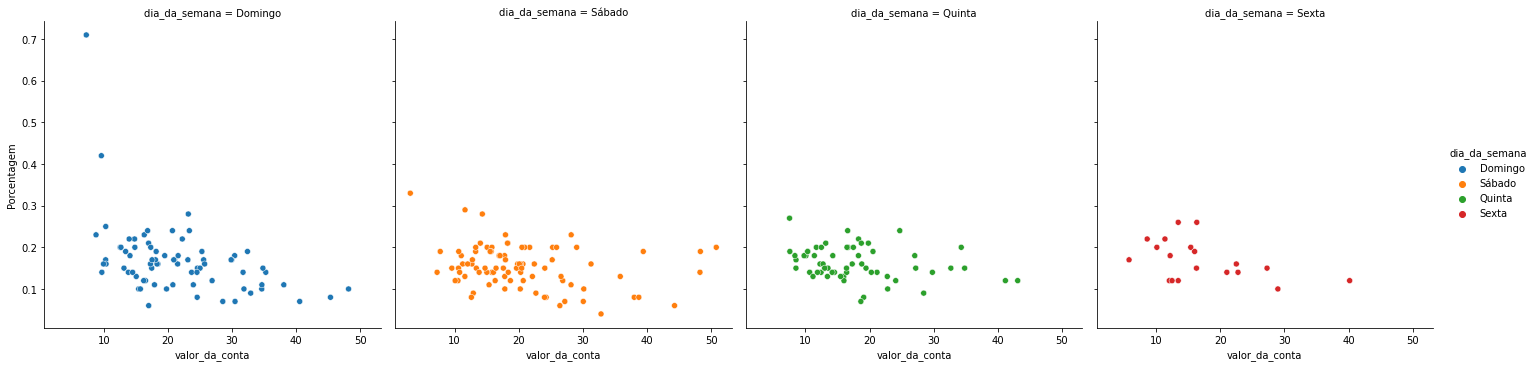

In [128]:
sns.relplot(x='valor_da_conta', y='Porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

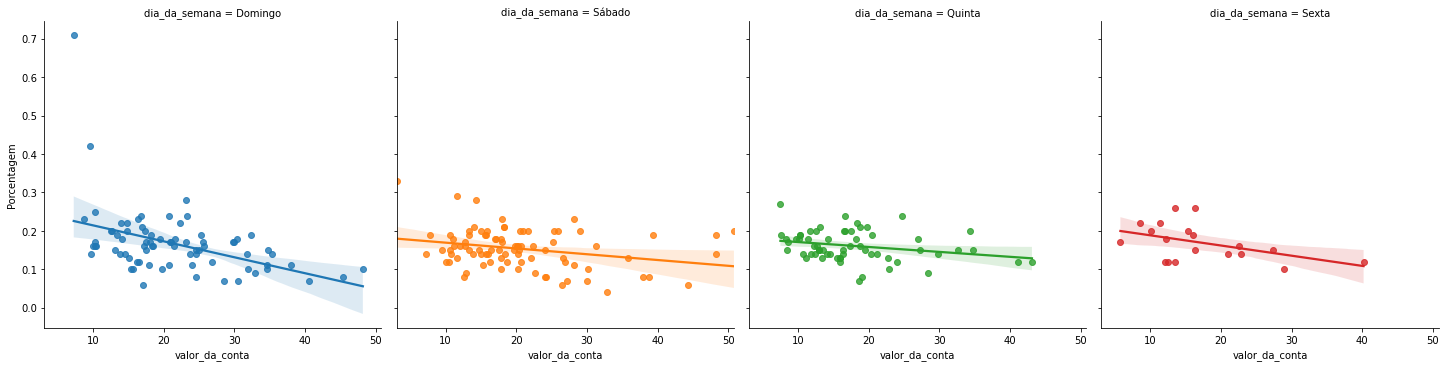

In [129]:
sns.lmplot(x='valor_da_conta', y='Porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

No domingo conforme o valor da conta mais alto, menos a porcentagem da gorjeta

**Análise descritiva**

In [130]:
media_geral_gorjeta = gorjetas.gorjeta.mean()
print('A Média geral das gorjetas é {}'.format(media_geral_gorjeta))

A Média geral das gorjetas é 2.9982786885245902


In [131]:
# Media das gorjetas dos dia da semana
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'Porcentagem']]

,valor_da_conta,gorjeta,Porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [132]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

Verificando que a media de gorjeta e de valor da conta no domingo é a maior, porém numero de pessoas ou pratos no sábado que é maior. Vamos analisar o motivo.

## Teste de Hipótese

**H<sup>null</sup>**

A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>alt</sup>**

A taxa de distribuição do valor da conta é diferente no sábado e no domingo

In [133]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'")['valor_da_conta']

In [134]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'")['valor_da_conta']

In [135]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print("O valor da do p-value {}". format(r2))

O valor da do p-value RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)


**H<sup>null</sup>**

A distribuição do valor da conta é igual no sábado e no domingo

 So rejeitaria a hipotese nula, caso fosse abaixdo de 5% de siginificanca 0.05

# Análise IV - Hora do dia

In [136]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [137]:
# visualizando os elementos da hora dia
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

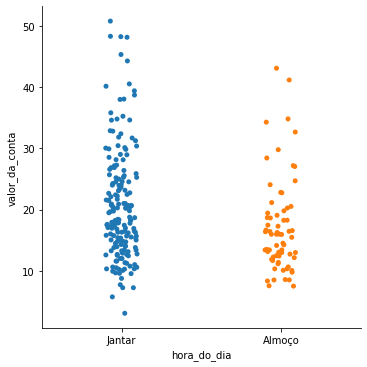

In [138]:
# Plotando grafico categorico
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

visualmente os valores do jantar sao maiores que almoço

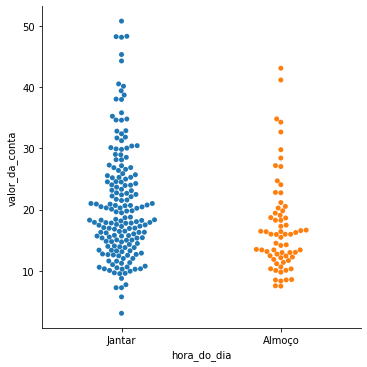

In [139]:
# expandindo os pontos com swarm
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

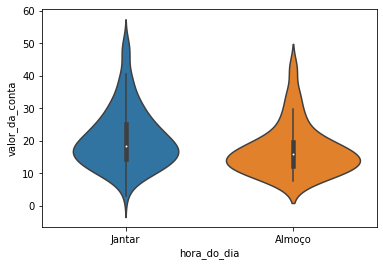

In [140]:
# Grafico violino
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

Valores da conta almoço estao concetrados em 10 e 20, equanto jantar entre 17 a 26

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

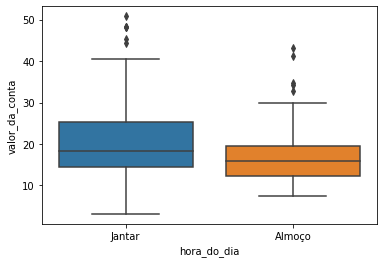

In [141]:
#Grafico boxplot
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

A media do jantar e maior que almoço

In [142]:
# Montando query dos valores da conta somente do almoço
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

In [143]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

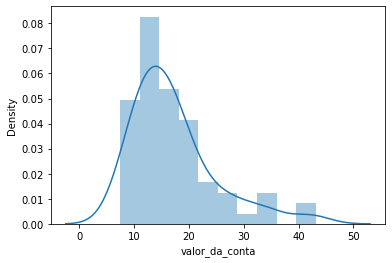

In [144]:
# Histograma do valor da conta do almoço
sns.distplot(almoco)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

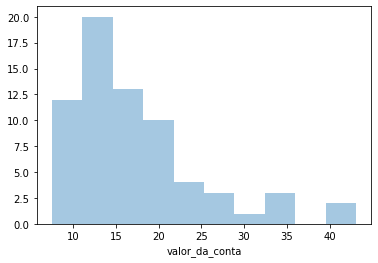

In [145]:
sns.distplot(almoco, kde=False)

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

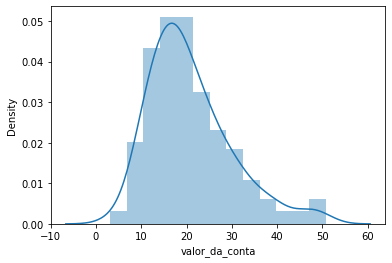

In [146]:
# Histograma do valor da conta do jantar
sns.distplot(jantar)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

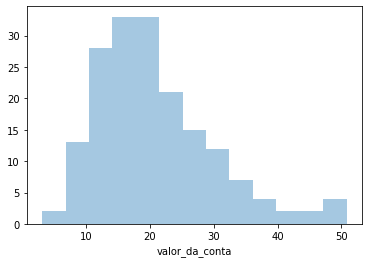

In [147]:
sns.distplot(jantar, kde=False)

## Teste de Hipótese

**H<sup>null</sup>**

A distribuição do valor da conta é igual no almoço e no jantar

**H<sup>alt</sup>**

A taxa de distribuição do valor da conta é diferente no almoço e no jantar

In [148]:
# verificando a media do almoço e jantar
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'Porcentagem']]

,valor_da_conta,gorjeta,Porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [149]:
r3 = ranksums(almoco, jantar) 
print('O valor o p-value é {}'.format(r3))

O valor o p-value é RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)


**H<sup>alt</sup>**

**A taxa de distribuição do valor da conta é diferente no almoço e no jantar**

### Teste de Hipótese

**H<sup>null</sup>**

A distribuição da taxa da gorjeta igual no almoço e no jantar

**H<sup>alt</sup>**

A taxa de distribuição da taxa da gorjeta é diferente no almoço e no jantar

In [150]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").Porcentagem

In [151]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").Porcentagem

In [152]:
r4= ranksums(porcentagem_almoco, porcentagem_jantar) 
print('O valor o p-value é {}'.format(r4))

O valor o p-value é RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)


**H<sup>null</sup>**

**A distribuição da taxa da gorjeta igual no almoço e no jantar**